# Data Preprocessing and ML with wine dataset

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
wine=pd.read_csv("https://assets.datacamp.com/production/course_6576/datasets/wine_types.csv")
print(wine.head())
print(wine.shape)

   Type  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0     1    14.23        1.71  2.43               15.6        127   
1     1    13.20        1.78  2.14               11.2        100   
2     1    13.16        2.36  2.67               18.6        101   
3     1    14.37        1.95  2.50               16.8        113   
4     1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05        

## Modeling without normalizing
Let's take a look at what might happen to your model's accuracy if you try to model data without doing some sort of standardization first. Here we have a subset of the wine dataset. One of the columns, Proline, has an extremely high variance compared to the other columns. This is an example of where a technique like log normalization would come in handy, which you'll learn about in the next section.

In [3]:
X=wine.drop("Type",axis=1)
y=wine["Type"].values

#### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.7407407407407407


#### SVC

In [5]:
from sklearn.svm import SVC
svc=SVC()
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Fit the k-nearest neighbors model to the training data
svc.fit(X_train, y_train)

# Score the model on the test data
print(svc.score(X_test, y_test))

0.42592592592592593


## Log normalization in Python
Now that we know that the `Proline` column in our wine dataset has a large amount of variance, let's log normalize it.

`Numpy` has been imported as `np` in your workspace.

In [6]:
# Print out the variance of the Proline column
print(wine["Proline"].var())

# Apply the log normalization function to the Proline column
wine["Proline_log"] = np.log(wine["Proline"])

# Check the variance of the Proline column again
print(wine["Proline_log"].var())

99166.71735542428
0.17231366191842018


## Scaling data - standardizing columns
Since we know that the Ash, Alcalinity of ash, and Magnesium columns in the wine dataset are all on different scales, let's standardize them in a way that allows for use in a linear model.

In [7]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create the scaler
ss = StandardScaler()

# Take a subset of the DataFrame you want to scale 
wine_subset = wine[["Ash","Alcalinity of ash","Magnesium"]]

# Apply the scaler to the DataFrame subset
wine_subset_scaled = ss.fit_transform(wine_subset)

## KNN and SVC on scaled data
The accuracy score on the unscaled wine dataset was decent, but we can likely do better if we scale the dataset. The process is mostly the same as the previous exercise, with the added step of scaling the data. Once again, the knn model as well as the X and y data and labels set have already been created for you.

### KNN

In [10]:
# Create the scaling method.
ss = StandardScaler()

# Apply the scaling method to the dataset used for modeling.
X_scaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the k-nearest neighbors model to the training data.
knn.fit(X_train,y_train)

# Score the model on the test data.
print(knn.score(X_test,y_test))

0.9629629629629629


### SVC

In [11]:
# Fit the svc model to the training data.
svc.fit(X_train,y_train)

# Score the model on the test data.
print(svc.score(X_test,y_test))

0.9814814814814815


## Checking for correlated features
Let's take a look at the wine dataset again, which is made up of continuous, numerical features. Run Pearson's correlation coefficient on the dataset to determine which columns are good candidates for eliminating. Then, remove those columns from the DataFrame.

In [12]:
wine=pd.read_csv("https://assets.datacamp.com/production/course_6576/datasets/wine_types.csv")
# Print out the column correlations of the wine dataset
print(wine.corr())

# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = "Flavanoids"

# Drop that column from the DataFrame
wine = wine.drop(to_drop, axis=1)
print(wine.head())

                                  Type   Alcohol  Malic acid       Ash  \
Type                          1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230

## Using PCA
Let's apply PCA to the wine dataset, to see if we can get an increase in our model's accuracy.

In [13]:
from sklearn.decomposition import PCA

# Set up PCA and the X vector for diminsionality reduction
pca = PCA()
wine_X = wine.drop("Type", axis=1)
y=wine["Type"]

# Apply PCA to the wine dataset X vector
transformed_X = pca.fit_transform(wine_X)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

[9.98098798e-01 1.73593305e-03 9.43282757e-05 4.89438533e-05
 1.04695097e-05 5.60981698e-06 2.79968212e-06 1.44536313e-06
 9.75418873e-07 3.94184513e-07 2.13661389e-07 8.91974959e-08]


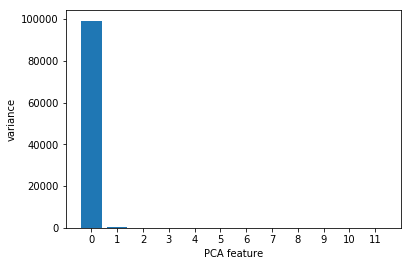

In [18]:
features=range(pca.n_components_)

import matplotlib.pyplot as plt
plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [14]:
# Split the transformed X and the y labels into training and test sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(transformed_X, y, test_size=0.3, random_state=42)

# Fit knn to the training data
knn.fit(X_wine_train,y_wine_train)

# Score knn on the test data and print it out
print(knn.score(X_wine_test,y_wine_test))

0.7407407407407407


In [15]:
# Split the transformed X and the y labels into training and test sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(transformed_X, y, test_size=0.3, random_state=42)

# Fit svc to the training data
svc.fit(X_wine_train,y_wine_train)

# Score svc on the test data and print it out
print(svc.score(X_wine_test,y_wine_test))

0.4074074074074074


In [16]:
pca1=PCA(n_components=1)
pca1.fit(X)
X_transformed1 = pca1.transform(X)
print(X_transformed1.shape)

(178, 1)


### KNN

In [17]:
# Split the transformed X and the y labels into training and test sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_transformed1, y, test_size=0.3, random_state=42)

# Fit knn to the training data
knn.fit(X_wine_train,y_wine_train)

# Score knn on the test data and print it out
print(knn.score(X_wine_test,y_wine_test))

0.7222222222222222


### SVC

In [18]:
svc.fit(X_wine_train,y_wine_train)

# Score svc on the test data and print it out
print(svc.score(X_wine_test,y_wine_test))

0.5370370370370371
